# DL Hello World: MNIST

## Multi-Class Classification with 2D Convolution

### Logistic Function, Odds Ratio, Sigmoid, Softmax, and Log-Softmax

This note explains the mathematical intuition behind logistic regression, including the **odds ratio**, **sigmoid**, **softmax**, and **log-softmax** functions.

---

#### Odds Ratio and Logits

In binary classification, we model the probability $P$ of class 1 (e.g., a positive class) using the **sigmoid function**. Starting with the odds:

$$
\text{odds} = \frac{P}{1 - P}
$$

Taking the logarithm of both sides gives the **log-odds** (also called the **logit** function):

$$
z = \log\left(\frac{P}{1 - P}\right)
$$

Solving for $P$:

$$
P = \frac{1}{1 + e^{-z}}
$$

This is the **sigmoid** function:


#### Sigmoid Function

The sigmoid function maps any real number $z$ to the interval $(0, 1)$:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

In logistic regression, $z$ is often a linear function of the input features:

$$
z = \sum_{i} w_i x_i + b
$$

Here, $w_i$ are weights, $x_i$ are input features, and $b$ is the bias.


#### Softmax Function

For **multi-class classification** (more than 2 classes), we generalize the sigmoid using the **softmax** function:

$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{c=1}^{N} e^{z_c}}
$$

- $z_i$ is the score (logit) for class $i$
- $N$ is the number of classes
- Output is a probability distribution across all $N$ classes

#### Summary

| Function       | Purpose                            | Output Range      |
|----------------|-------------------------------------|-------------------|
| Odds Ratio     | Relates $P$ to $1 - P$              | $[0, \infty)$     |
| Logit ($z$)    | Log of odds                         | $(-\infty, \infty)$ |
| Sigmoid        | Binary probability from $z$         | $(0, 1)$          |
| Softmax        | Multi-class probabilities           | $(0, 1)$, sum = 1 |
| Log-Softmax    | Log-probability (numerically safe)  | $(-\infty, 0)$    |

---


### Cross-Entropy Loss in Classification

**Cross-entropy loss** is widely used in **multi-class classification** problems to measure the difference between the predicted probability distribution and the true distribution (i.e., ground truth labels).

Cross-entropy originates from information theory discussed in the last lecture. It quantifies the "distance" between two probability distributions:
- The **true distribution** $y$
- The **predicted distribution**


For **binary classification**, where the true label $y \in \{0, 1\}$ and the predicted probability is $\hat{y} = \sigma(z)$, the **binary cross-entropy loss** is:

$$
\mathcal{L}_{\text{binary}}(y, \hat{y}) = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

- If $y = 1$: the loss is $-\log(\hat{y})$
- If $y = 0$: the loss is $-\log(1 - \hat{y})$

This penalizes confident wrong predictions very heavily.

For **multi-class classification**, given a vector of **logits** $\vec{z} = [z_1, z_2, \dots, z_C]$, the **softmax** function outputs class probabilities:

$$
\text{Softmax}(z_i) = \hat{y}_i = \frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}}
$$

Then the cross-entropy for **multi-class classification** is simply:

$$
\mathcal{L}_{\text{CE}} = -\log\left( \frac{e^{z_c}}{\sum_{j=1}^C e^{z_j}} \right) = -\log\left(\text{Softmax}(z_i)\right)
$$
---
---

This simple code shows how softmax turns raw logits into class probabilities, and how the maximum logit gets the highest probability.

In [ ]:
import torch
import torch.nn as nn

# Dummy logits for a single example with c=3 classes
logits = torch.tensor([2.0, 1.0, 0.1])

# Define softmax module
softmax = nn.Softmax(dim=0)

# Apply softmax to logits
probs = softmax(logits)

# Show results
print("Logits:         ", logits)
print("Probabilities:  ", probs)
print("Predicted class:", torch.argmax(probs).item())

Logits:          tensor([2.0000, 1.0000, 0.1000])
Probabilities:   tensor([0.6590, 0.2424, 0.0986])
Predicted class: 0


# MNIST Dataset

## What Is MNIST?

The **MNIST** dataset is the "Hello, World" of computer vision and deep learning.

- It consists of **70,000 grayscale images** of handwritten digits (0–9)
- Used for **training and testing classification models**
- Image size: **28 × 28 pixels**
- Split into:
  - 60,000 images for training
  - 10,000 images for testing

Each image is labeled with the correct digit, making it a **supervised learning** dataset.


### Why MNIST?
- Simple and small — great for learning
- Still useful for benchmarking basic models (like MLPs and CNNs)
- Built-in support in PyTorch and TensorFlow

Next, we’ll see how to load MNIST using PyTorch’s `torchvision` package.

In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transform: convert images to tensors and normalize to [0, 1]
transform = transforms.ToTensor()

# Download and load the training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Download and load the test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Show dataset info
print("Training set size:", len(train_dataset))
print("Test set size:", len(test_dataset))

# Show one example
images, labels = next(iter(train_loader))
print("Image shape:", images[0].shape)
print("Label:", labels[0])

100%|██████████| 9.91M/9.91M [00:04<00:00, 2.14MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 218kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.10MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 503kB/s]


Training set size: 60000
Test set size: 10000
Image shape: torch.Size([1, 28, 28])
Label: tensor(8)


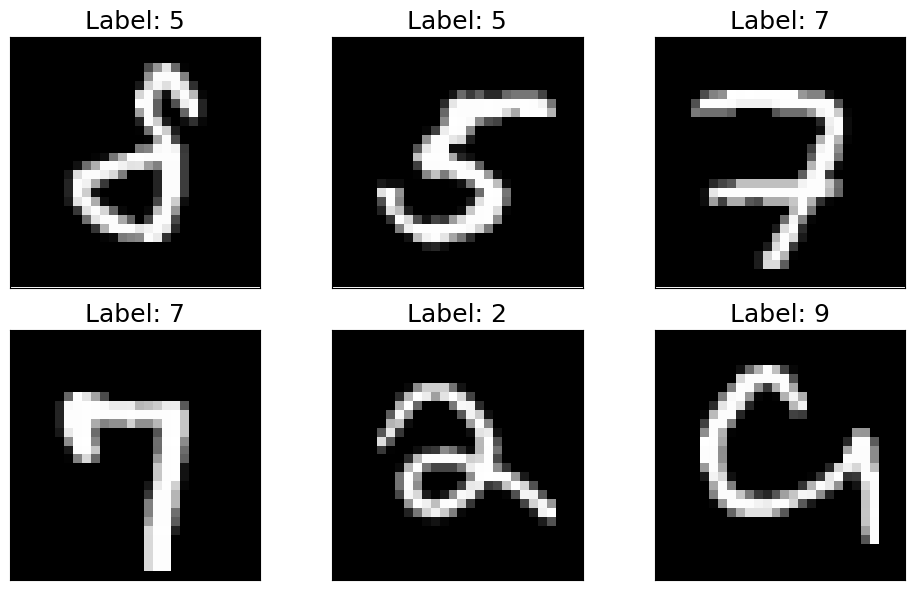

In [13]:
import matplotlib.pyplot as plt

# Get one batch
images, labels = next(iter(train_loader))

# Plot 6 images (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.flatten()

for i in range(6):
    img = images[i].squeeze(0)  # shape: [1, 28, 28] → [28, 28]
    label = labels[i].item()
    
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(f"Label: {label}", fontsize=18)
    axs[i].tick_params(axis='both', labelsize=16)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

## 1. Traning

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# -----------------------------------------------------
# 1. Load MNIST dataset (with ToTensor transform)
# -----------------------------------------------------
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# -----------------------------------------------------
# 2. Choose device
# -----------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# -----------------------------------------------------
# 3. Define CNN model using nn.Sequential
# -----------------------------------------------------
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, padding=1),        # [B, 1, 28, 28] → [B, 16, 28, 28]
    nn.LeakyReLU(0.01),
    nn.Conv2d(16, 32, kernel_size=3, padding=1),       # [B, 16, 28, 28] → [B, 32, 28, 28]
    nn.LeakyReLU(0.01),
    nn.Flatten(),                                      # [B, 32, 28, 28] → [B, 25088]
    nn.Linear(32 * 28 * 28, 10)                         # Fully connected output: 10 classes
).to(device)

# -----------------------------------------------------
# 4. Define loss and optimizer
# -----------------------------------------------------
criterion = nn.CrossEntropyLoss()                              # For multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# -----------------------------------------------------
# 5. Training loop
# -----------------------------------------------------
epochs = 5
loss_vals = []

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)               # Forward pass
        loss = criterion(outputs, labels)     # Compute loss

        optimizer.zero_grad()  # Clear gradients
        loss.backward()        # Backpropagation
        optimizer.step()       # Update weights

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    loss_vals.append(avg_loss)

    print(f"Epoch {epoch+1:2d} | Loss: {avg_loss:.4f}")


Using device: cuda
Epoch  1 | Loss: 0.2721
Epoch  2 | Loss: 0.0804
Epoch  3 | Loss: 0.0560
Epoch  4 | Loss: 0.0435
Epoch  5 | Loss: 0.0355


## 2. Performance Assessment

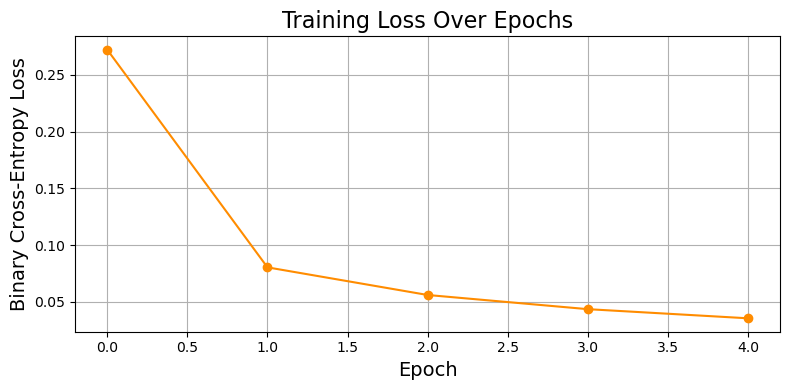

In [7]:
# ---------------------------------------
# 6. Visualize the loss curve
# ---------------------------------------
plt.figure(figsize=(8, 4))
plt.plot(loss_vals, 'o-', color='darkorange')
plt.title("Training Loss Over Epochs", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Binary Cross-Entropy Loss", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Test Accuracy: 98.53%


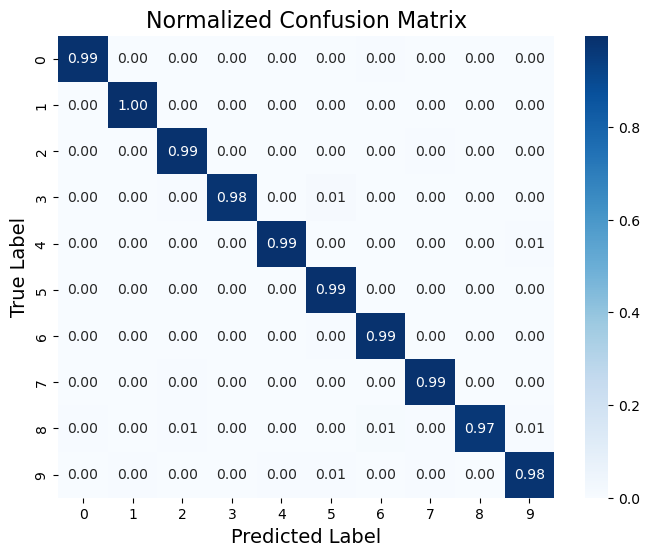

In [8]:
# Import statments
from torchmetrics.classification import Accuracy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------
# Define accuracy metric using torchmetrics library `pip install torchmetrics`
# -----------------------------------------------------
metric = Accuracy(task="multiclass", num_classes=10).to(device)

# -----------------------------------------------------
# Evaluate model and collect predictions/labels
# -----------------------------------------------------
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        # Update accuracy metric
        metric.update(preds, labels)

        # Store for confusion matrix
        all_preds.append(preds.cpu())
        all_labels.append(labels.cpu())

# -----------------------------------------------------
# Compute final accuracy
# -----------------------------------------------------
accuracy = metric.compute().item()
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")

# -----------------------------------------------------
# Confusion Matrix (normalized)
# -----------------------------------------------------
y_true = torch.cat(all_labels).numpy()
y_pred = torch.cat(all_preds).numpy()

cm = confusion_matrix(y_true, y_pred, normalize='true')

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Normalized Confusion Matrix", fontsize=16)
plt.show()


# Data Augmentation

**Data augmentation** is a technique used in machine learning, especially in computer vision, to artificially expand the size and diversity of a training dataset by applying various transformations to the input data.

These transformations can include:

- **Rotation** — randomly rotating the image
- **Translation** — shifting the image left/right or up/down
- **Scaling** — zooming in or out
- **Shearing** — slanting the image in one direction
- **Horizontal/Vertical Flip**
- **Color Jitter** — randomly changing brightness, contrast, etc.
- **Random Cropping**
- **Adding noise**


##  Why Is Data Augmentation Important?

###  1. Improves Generalization

Augmentation helps your model become **invariant** to transformations like rotation, scale, etc., which are common in real-world data.

> Example: The digit '6' can appear rotated slightly in handwriting. A model trained only on upright digits may fail to classify rotated ones correctly.

###  2. Reduces Overfitting

By feeding the model new variations of the same image, data augmentation makes it harder for the model to memorize the training set and encourages it to learn more robust features.

###  3. Acts Like Regularization

Data augmentation is often considered a **form of implicit regularization** — it introduces variability that forces the model to adapt more broadly.

---

## At Test Time?

While data augmentation is mostly used during **training**, applying controlled transformations (like small rotations) at **test time** can help:

- Evaluate **robustness** of your model
- Check how sensitive it is to real-world variations

Next, we’ll rotate MNIST test images and see how well our trained model performs on them.


 Accuracy on Rotated Test Set: 92.04%


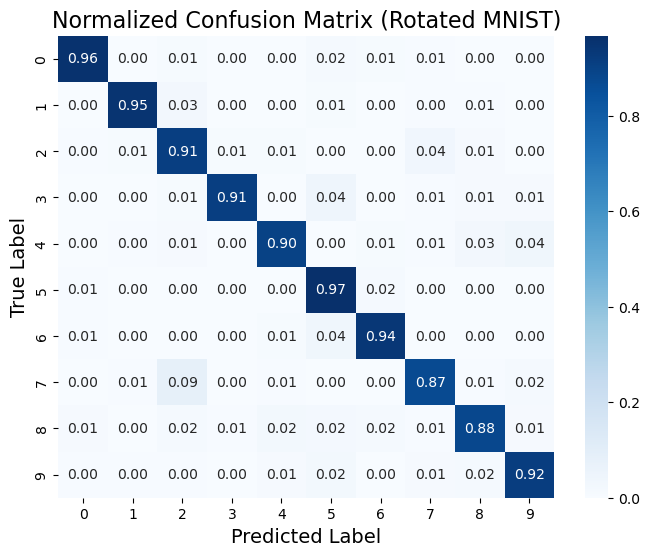

In [9]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchmetrics.classification import Accuracy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------
# 1. Define rotated test set (e.g., rotate ±30 degrees)
# -----------------------------------------------------
rotation_transform = transforms.Compose([
    transforms.RandomRotation(degrees=30),  # Randomly rotate between -30° and +30°
    transforms.ToTensor()
])

# Apply rotation transform to the MNIST test set
rotated_test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=rotation_transform)
rotated_test_loader = DataLoader(rotated_test_dataset, batch_size=128, shuffle=False)

# -----------------------------------------------------
# 2. Set up accuracy metric and eval mode
# -----------------------------------------------------
model.eval()
metric = Accuracy(task="multiclass", num_classes=10).to(device)

all_preds = []
all_labels = []

# -----------------------------------------------------
# 3. Evaluate the model on rotated test set
# -----------------------------------------------------
with torch.no_grad():
    for images, labels in rotated_test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        metric.update(preds, labels)
        all_preds.append(preds.cpu())
        all_labels.append(labels.cpu())

# -----------------------------------------------------
# 4. Compute accuracy
# -----------------------------------------------------
acc = metric.compute().item()
print(f" Accuracy on Rotated Test Set: {acc * 100:.2f}%")

# -----------------------------------------------------
# 5. Plot normalized confusion matrix
# -----------------------------------------------------
import numpy as np
from sklearn.metrics import confusion_matrix

y_true = torch.cat(all_labels).numpy()
y_pred = torch.cat(all_preds).numpy()

cm = confusion_matrix(y_true, y_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Normalized Confusion Matrix (Rotated MNIST)", fontsize=16)
plt.show()


## Why Pooling Improves Robustness to Augmentations

Another important reason our CNN’s accuracy dropped on rotated MNIST is the **absence of pooling layers**.

While data augmentation improves model generalization, **pooling layers**, especially **max pooling**, inherently improve a CNN's robustness to small spatial changes in the input.

### What Is Pooling?

Pooling operations downsample the feature maps produced by convolutional layers.

- **Max Pooling**: takes the maximum value in a region (e.g., 2×2 window)
- **Average Pooling**: takes the average

### Example: MaxPool2d(kernel_size=2, stride=2)
Reduces a 28×28 feature map to 14×14 by selecting the **strongest activations** in non-overlapping 2×2 regions.


### Why Pooling Helps with Robustness

- **Translation Invariance**: Small shifts in the input image (e.g., digit slightly moved) won’t drastically change the pooled features
- **Rotation/Scale Tolerance**: Even when digits are rotated slightly, the strongest local features often remain active
- **Focus on "What" not "Where"**: Pooling helps the network focus on *what* features are present, not *exactly where* they are

### Conclusion

> Pooling is not just about downsampling — it makes your model more **tolerant to real-world variations** in the data.

To build a truly robust CNN:
- Use **data augmentation** during training
- Include **pooling layers** after convolutions

These two strategies together make CNNs **more resilient** to transformations like rotation, scale, translation, and noise.

Next step (**YOUR HOMEWORK**): Add a `MaxPool2d` layer after your `Conv2d` blocks and retrain the model!


---
---
# CNN Applications in Astroparticle and Particle Physics

Convolutional Neural Networks (CNNs) are powerful tools that have been successfully applied to several areas of fundamental physics. Below are two notable and impactful use cases:

## 1. Cosmic Microwave Background (CMB) Anomaly Detection

CNNs are used to identify subtle features or deviations in the Cosmic Microwave Background (CMB) that might hint at **new physics beyond the Standard Model**. These include detecting:

- Primordial non-Gaussianities
- Anisotropies caused by exotic processes during inflation
- Topological defects or secondary anisotropies

Recent works have introduced **spherical CNNs** that operate directly on spherical CMB sky maps, preserving geometric features and enabling full-sky analysis.

📄 **Reference**:  
Jorik Melsen et al., *“Detecting Primordial Non-Gaussianity Using Spherical CNNs”*, [arXiv:2412.12377](https://arxiv.org/abs/2412.12377)

**Figure 1**: Full-sky map of CMB temperature anisotropies from the Planck satellite.  
<img src="Planck_s_view_of_the_cosmic_microwave_background_pillars.jpg" width="600"/>


## 2. Boosted Jet Identification via Jet Images

In collider physics, "jets" are collimated sprays of particles from quarks and gluons. When heavy particles (like top quarks or W/Z bosons) are produced with high momentum, their decay products merge into a single jet — a **boosted jet**.

Jet images convert the energy deposition in detectors into 2D pixelated images, allowing CNNs to:

- Distinguish signal jets (e.g., top quarks) from QCD background
- Extract detailed substructure patterns
- Improve classification performance beyond traditional variables

📄 **Reference**:  
P. T. Komiske et al., *“Deep Learning in Color: Towards Automated Quark/Gluon Jet Discrimination”*, [arXiv:1612.01551](https://arxiv.org/abs/1612.01551)

**Figure 2**: Jet formation from proton-proton collisions, fragmentation, hadronization, and energy deposition in a detector, forming a pixelated image.  
<img src="jetcartoon.png" width="600"/>